# Iris Species
## Classify iris plants into three species

### Getting the data

In [27]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

iris = datasets.load_iris()

type(iris)

sklearn.utils.Bunch

In [4]:
print(iris.keys()) #keys of the dataset imported

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
type(iris.data) , type(iris.target)  #datatype of values

(numpy.ndarray, numpy.ndarray)

In [6]:
iris.target_names   #species name

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris.feature_names   #feature names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
iris.data.shape #row and columns of data

(150, 4)

In [9]:
iris.data   #value of features

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [10]:
X = iris.data
Y = iris.target

df = pd.DataFrame(X , columns=iris.feature_names)

In [11]:
df.head()  #shows the first five elements in the dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Data Visualization

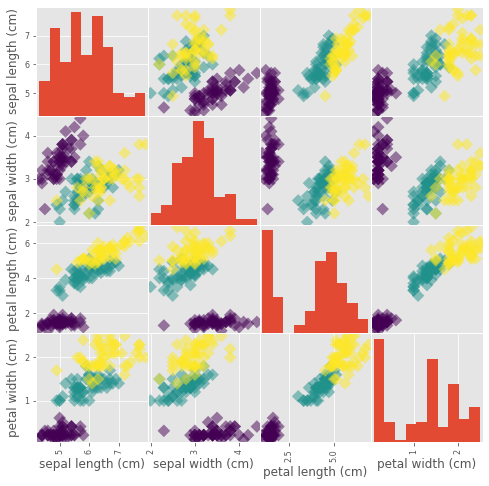

In [12]:
_ = pd.plotting.scatter_matrix(df, c = Y, figsize = [8,8],
                      s=80, marker = 'D');

In [13]:
#Diagonals are the histogram of the features corresponding to rows and columns
#Off diagonal are scatterplots

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [15]:
X_new = np.array([[5.6,2.8,3.9, 1.1],
                 [5.7,2.6, 3.8, 1.3],
                 [4, 3.5, 1.5, 0.9]])
###giving the sample input for the predictions to be made
prediction = knn.predict(X_new)
X_new.shape

(3, 4)

In [28]:
print('Prediction: {}'.format(prediction))    # Versicolor and Serosa are 1 and 0 respectively

Prediction: [1 1 0]


## Train/test split

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=21, stratify=Y)

In [25]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


In [26]:
knn.score(X_test, y_test)

0.9555555555555556